# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: Yingying LIU

**ID**: yl3984

> **Due Date**
>
> Thursday, 09/25/25, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to draw a systems diagram and identify the type
    of a feedback.
-   Problem 2 asks you to model contaminant concentrations in a river
    and use simulation to compare the concentrations to a regulatory
    standard.
-   Problem 3 asks you to explore the implications of an ice-albedo
    feedback in the Earth’s climate system by understanding the
    equilibria of the modeled system and their stabilities.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add("GraphRecipes")

  Activating project at `c:\Users\Lyy\lab1-132140636yyy\hw02`
    Updating registry at `C:\Users\Lyy\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Lyy\lab1-132140636yyy\hw02\Project.toml`
  No Changes to `C:\Users\Lyy\lab1-132140636yyy\hw02\Manifest.toml`


In [3]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots
using GraphRecipes

## Problems (Total: 30 Points)

### Problem 1 (5 points)
Draw a systems diagram for the relationship between global mean
temperature, atmospheric CO<sub>2</sub> concentrations, and ocean
CO<sub>2</sub> concentrations. What are the signs of the interactions
between these components and why? What does this suggest about the
overall feedback between temperature and the ocean carbon cycle?

### Answer 1
**The interations between these components**:
1. Global warming reduces (-) ocean CO<sub>2</sub> uptake according to Henry's law, since warmer water dissolve less CO<sub>2</sub>. <br>
2. A lower capacity of the ocean to absorb CO<sub>2</sub> leads to higher (-) atmospheric CO<sub>2</sub> concentration. Based on the mass-balance of air-sea CO<sub>2</sub> exchange, less CO<sub>2</sub> stored in ocean means more remains in the atmosphere. <br>
3. At the same time, a higher partial pressure of CO<sub>2</sub> in atmosphere drives more (+) CO<sub>2</sub> to dissolve into the ocean. <br>
4. Increasing atmospheric CO<sub>2</sub> further increaces (+) global mean temperature, since more CO<sub>2</sub> in the atmosphere traps more outgoing longwave radiation and warms the planet. <br>
5. Overall, these interactions form a net positive feedback loop. Rising temperatures weaken ocean uptake, which raises atmospheric CO<sub>2</sub>, which in turn causes additional warming. <br>

**Suggestions for the overall feedback**
1. Enhance biological carbon uptake in the ocean (e.g., through supporting the biological pump) to increase oceanic CO₂ storage and counteract the decline in solubility-driven uptake. <br>
2. Use numerical models to quantify the additional warming expected from this feedback. This can help define the safe range of global temperature increases to avoid triggering stronger positive feedbacks. <br>

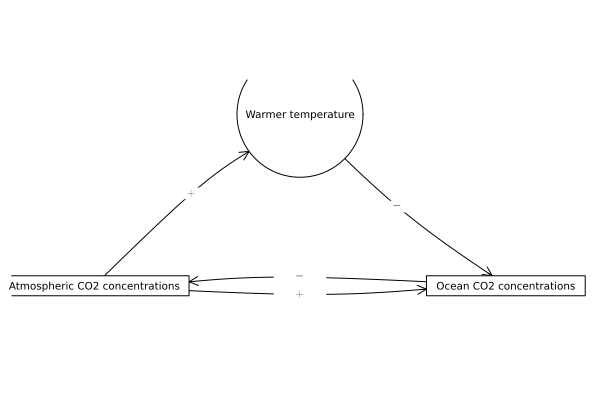

In [53]:
A = [0 0 1;
    1 0 1;
    0 1 0]

names = ["Warmer temperature", "Atmospheric CO2 concentrations", "Ocean CO2 concentrations", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict(
    (1, 3) => L"\textbf{-}",   # Temp → Ocean (-)
    (2, 3) => L"\textbf{+}",   # Atmosphere → Ocean (+)
    (2, 1) => L"\textbf{+}",   # Atmosphere → Temp (+)
    (3, 2) => L"\textbf{-}"    # Ocean → Atmosphere (−, weaker uptake increases  air CO2)
)
shapes=[:circle, :rect, :rect]
xpos = [0, -1.2, 1.2]
ypos = [1, 0, 0]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.1, markershapes=shapes, markercolor=:white, x=xpos, y=ypos, curves=true,edgelabelsize=12)
display(p)

> **Tip**
>
> Think about Henry’s law for CO<sub>2</sub>.

### Problem 2 (15 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$ and is deposited by the atmosphere along the
river at a rate of 54 kg/km/d. 

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 2" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
2</figcaption>
</figure>

#### Problem 2.1

Draw a systems diagram with the relevant control volume(s) denoted and
any relevant in/out-flows between these boxes. How did you decide how
many boxes were needed?

#### Answer 2.1
There are twp boxes are needed. They are Downstream of Source A (Box1), Downstream of Source B (Box2). <br>

**Box1** receives input from source A and distributed depostition along the downstream 15 km. **Box2** receives outflow from Box1 and plux the input from Source B.

These two boxes are neccessary to explore how two source of wastewater interact via advenction, decay and deposition.


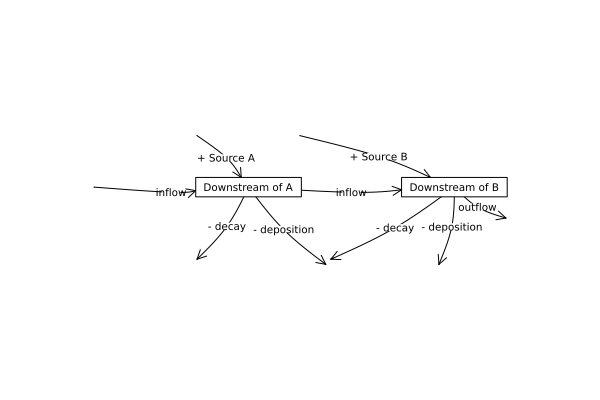

In [165]:
A = [
    0 1 0 0 0 0 0 0 0 0;  # 1: Upstream
    0 0 1 0 0 1 1 0 0 0;  # 2: Between
    0 0 0 0 0 0 0 1 1 1;  # 3: Downstream
    0 1 0 0 0 0 0 0 0 0;  # 4: Source A -> Box 2
    0 0 1 0 0 0 0 0 0 0;  # 5: Source B -> Box 3
    0 0 0 0 0 0 0 0 0 0;  # 6: Decay 
    0 0 0 0 0 0 0 0 0 0;  # 7: Deposition 
    0 0 0 0 0 0 0 0 0 0;  # 8: Decay 
    0 0 0 0 0 0 0 0 0 0;  # 9: Deposition 
    0 0 0 0 0 0 0 0 0 0;  # 10: Outflow
]

names = [
    "",
    "Downstream of A",
    "Downstream of B",
    "",
    "",
    "",
    "",
    "",
    "",
    "",
]

# modify this dictionary to add labels
edge_labels = Dict(
    (1, 2) => "inflow",
    (2, 3) => "inflow",
    (4, 2) => "+ Source A",
    (5, 3) => "+ Source B",
    (2, 6) => "- decay",
    (2, 7) => "- deposition",
    (3, 8) => "- decay",
    (3, 9) => "- deposition",
    (3, 10) => "outflow"
)
shapes=[:circle, :rect, :rect, :circle, :circle, :circle, :circle, :circle, :circle, :circle]
xpos = [-2.5, -1, 1, -1.5, -0.5,-1.5, -0.25, -0.2, 0.85, 1.5]
ypos = [0.5, 0.5, 0.5, 1.0, 1.0, -0.2, -0.25, -0.2, -0.25, 0.2]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.35, markershapes=shapes, markercolor=:white, x=xpos, y=ypos,edgelabelsize=8)
display(p)

#### Problem 2.2

Develop a model for the concentration of CRUD downriver by formulating
and solving the appropriate differential equation(s) analytically.

#### Answer 2.2
Assume:
1. x = distance downriver (km), with x = 0 is the location of SourceA, <br>
2. u = river velocity (km/day), <br>
3. I = the input of CRUD from upstream river (kg/day), <br> 
4. m(x,t) = mass of CRUD per unit river length at location x and time t, <br>
5. k = first-order decay rate (d $^{-1}$ ), <br>
6. D = atmospheric depostition rate along river, <br>
7. $S_A$, $S_B$ = point source loads at SourceA and SourceB (kg/day), <br>

From Mass conservation equation (advection + decay + deposition + point sources), we can get this equation:

$\frac{\partial m}{\partial t} + \frac{\partial (um)}{\partial x} = -km - D + S_A\delta(x-x_A) + S_B\delta(x-x_B)$

Since u is constant, we can have $\frac{\partial (um)}{\partial x} = u \frac{\partial m}{\partial x} $, and in a balance system, $\frac{\partial m}{\partial t} = 0$, we can simplify the equation to:

$u\frac{\mathrm{d} m}{\mathrm{d} x} = S_A\delta(x-x_A) + S_B\delta(x-x_B)$ -km - D

We need to discuss it in different situations.

When the location is between sourceA and sourceB,
$\frac{\mathrm{d} m}{\mathrm{d} x} = -km/u - D/u$. Assume $\alpha=\frac{k}{u}$,$\beta=-\frac{D}{u}$. If we multipy the two sizes of ODE by the integrating factor $e^{\alpha}x$, we can get:

$m(x) = (m(x_0)-\frac{\beta}{\alpha})e^{-\alpha(x-x_0)}+\frac{\beta}{\alpha}$

After we put the values into this fomular and when we try to solve it analytically, we can get:
1. The input of CRUD from upstream $m_0 = 12.5 kg/km$.
2. Since the emission of CRUD from SourceA ($S_A$) and SourceB ($S_B$) is 360 and 420 kg/day, we can get $S_A\delta(x-x_A) + S_B\delta(x-x_B) = S_A/u + S_B/u = 78 kg/km$.

Put them into the code below, we can plot the CRUD concentration downstream.

Upstream m(0^-) = 12.5 kg/km
After Source A m(0^+) = 48.5 kg/km
Just before Source B m(15^-) = 0.0 kg/km
Just after Source B m(15^+) = 42.0 kg/km


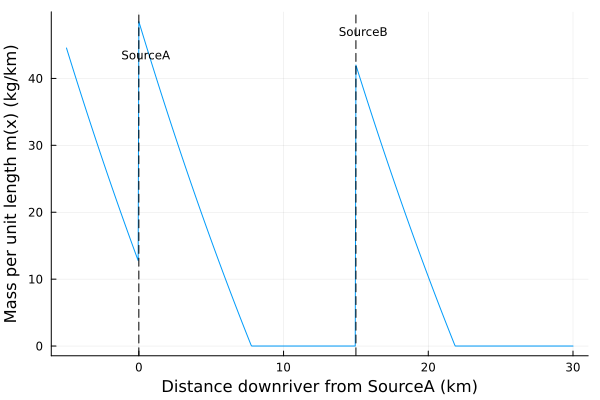

In [192]:
# Parameters
u = 10.0           # km/day
k = 0.36           # 1/day
D = 54.0           # kg/(km·day)  (deposition per km per day)
xA = 0.0
xB = 15.0
S_A = 360.0        # kg/day
S_B = 420.0        # kg/day
I = 125.0          # kg/day (upstream flux)

# Derived
alpha = k / u                   
beta = -D / u               
m0 = I / u                       # upstream mass per unit length (kg/km)
jumpA = S_A / u                  # kg/km
jumpB = S_B / u                  # kg/km

# Analytical section solution (equation (*))
function m_between(x, x0, m_x0)
    y1 = (m_x0 - beta/alpha) * exp(-alpha*(x - x0)) + beta/alpha
    y0 = 0
    return max(y1,y0)
end

# Compute piecewise values
m0_minus = m0                     # m(0^-)
m0_plus  = m0_minus + jumpA       # after A (m(0^+))

m_at_xB_minus = m_between(xB, xA, m0_plus)   # m(15^-)
m_at_xB_plus  = m_at_xB_minus + jumpB        # m(15^+)

# function that returns m(x) everywhere
function m_profile(x)
    if x < xA
        return m_between(x, 0.0, m0_minus)   # upstream (x<0)
    elseif x < xB
        return m_between(x, xA, m0_plus)     # between A and B
    else
        return m_between(x, xB, m_at_xB_plus) # downstream of B
    end
end

# evaluate on grid and plot
xs = range(-5.0, stop=30.0, length=750)
ms = [m_profile(x) for x in xs]

p1 = plot(xs, ms, xlabel="Distance downriver from SourceA (km)", ylabel="Mass per unit length m(x) (kg/km)",
     legend=false)
vline!([xA, xB], linestyle=:dash, color=[:black :black], label=["Source A" "Source B"])
annotate!([(xA+0.5, m0_plus-5, text("SourceA", 8)),
           (xB+0.5, m_at_xB_plus+5, text("SourceB", 8))])
# print a few key numbers
println("Upstream m(0^-) = $(round(m0_minus,digits=3)) kg/km")
println("After Source A m(0^+) = $(round(m0_plus,digits=3)) kg/km")
println("Just before Source B m(15^-) = $(round(m_at_xB_minus,digits=3)) kg/km")
println("Just after Source B m(15^+) = $(round(m_at_xB_plus,digits=3)) kg/km")

# show plot
display(current())


> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

#### Problem 2.3

Determine if the system in compliance with a regulatory limit of
$2.3\ \text{kg}/(1000 \text{m}^3)$. You can do this analytically or
computationally.

#### Answer 2.3
We plot the regulatory limit 2.3 kg in red line. And we can get that locations **7.38 km** downstream from SourceA and **6.45 km** downstream from SourceB (21.45 km from SourceA)can meet the regulatory limitation.

close to SourceA: 7.383177570093458, close to SourceB: 21.44859813084112


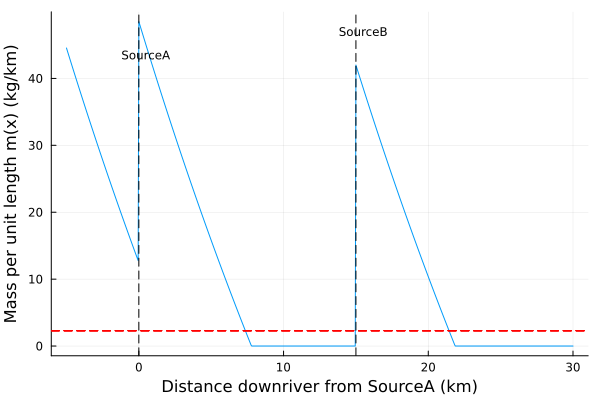

In [204]:
idx = findall(ms .< 2.3)
dists = xs[idx]
dA = minimum(dists[dists .>= 0])  
dB = minimum(dists[dists .>= 15]) 
println("close to SourceA: ",dA,", close to SourceB: ",dB)
hline!(p1, [2.3], linestyle=:dash, color=:red, label="Regulatory limit 2.3 kg/1000m^3")

### Problem 3 (10 points)

In class, we discussed the ice-albedo feedback and its possible
influence on melting the hypothesized [“Snowball
Earth”](https://en.wikipedia.org/wiki/Snowball_Earth). In this problem,
we’ll introduce a simple model of the Earth’s energy balance with
includes this feedback and examine the stability of the climate.

This simple model of the energy balance (averaged over the entire
planet) is:

<span id="eq-climate">$$
\underbrace{C\frac{dT}{dt}}_{\text{change in heat}} = \underbrace{\frac{(1-\alpha)S}{4}}_{\text{incoming radiation}} - \underbrace{(A - BT)}_{\text{outgoing radiation}} + \underbrace{a\ln \left(\frac{[CO_2]}{[CO_2]_{PI}}\right)}_{\text{greenhouse effect}},
 \qquad(1)$$</span>

where:

-   $T$ is the Earth’s global mean temperature (in $^\circ\text{C}$);
-   $C$ is the heat capacity of the atmosphere and shallow ocean, taken
    to be $51\ \text{J}/\text{m}^2/^\circ\text{C}$;
-   $\alpha$ is the planetary albedo, or the fraction of incoming
    radiation reflected by the Earth, which has a present-day value of
    approximately 0.3;
-   $S$ is the solar constant, or the amount of solar radiation received
    by the Earth averaged over area, which has a present-day value of
    $1368\ \text{W}/\text{m}^2$ but during the Neoproteorozoic Era had a
    value of $1272\ \text{W}/\text{m}^2$ (this is divided by four
    because the Earth is a sphere but $S$ is the radiation captured by a
    disc with radius equal to that of the Earth);
-   $A$ and $B$ are coefficients from the linearization of outgoing
    radiation physics, and have corresponding values
    $B=-1.3\ \text{W}/\text{m}^2/^\circ\text{C}$ (estimated from a
    number of lines of evidence about the sensitivity of outgoing
    radiation to temperature; this is negative due to a sign convention
    about the direction of incoming vs. outgoing radiation) and
    $A=221.2\ \text{W}/\text{m}^2$ (estimated by assuming the
    pre-industrial temperature of $14^\circ\text{C}$ was stable without
    anthropogenic greenhouse gas emissions).

We will ignore the greenhouse effect term as we are considering the
Earth system well before humans were around.

#### Problem 3.1

Discretize the climate model
(<a href="#eq-climate" class="quarto-xref">Equation 1</a>) using forward
Euler integration and a time step of $\Delta t = 1$ yr.

#### Answer 3.1
Forward Euler updates the temperature as:

$T_{n+1} = T_n + \Delta t \frac{dT}{dt} |_tn$

To solve this equation by Forward Euler method,
$C\frac{dT}{dt} = \frac{(1-\alpha)S}{4} - (A - BT) + a\ln \left(\frac{[CO_2]}{[CO_2]_{PI}}\right)$, we can get:
$T_{n+1} = T_n + \frac{\Delta t}{C}[\frac{(1-\alpha)S}{4}-(A-BT_n)]$

When $\Delta t = 1$ yr,

$T_{n+1} = T_n + \frac{1}{C}[\frac{(1-\alpha)S}{4}-(A-BT_n)]$

#### Problem 3.2

Rather than assuming a constant value for the albedo $\alpha$, we will
represent the ice-albedo feedback by letting $\alpha$ depend on $T$:

$$\alpha(T) = 
    \begin{cases} 
        \alpha_i & \quad \text{if } T \leq -10^\circ \text{C} \\
        \alpha_i + (\alpha_0 - \alpha_i)((T+10) / 20) & \quad \text{if } -10^\circ \text{C} \leq T \leq 10^\circ \text{C} \\
        \alpha_0 & \quad \text{if } T \geq 10^\circ \text{C}.
    \end{cases}$$

Let $\alpha_i = 0.5$ and $\alpha_0 = 0.3$. Simulate the simple climate
model using the Neoprotereozoic value of $S$ with temperature-varying
albedo for initial values of $T$ spanning
$-60^\circ\text{C} \leq T_0 \leq 30^\circ\text{C}$ over a period of 200
years. Plot the temperature trajectories. How many equilibria are there
and what are their stabilities?

#### Answer 3.2
As shown in figure, they only have one equilibrium and the value locates at the range between 45.9 and 47.9. 

And for the analysis of stability, we can calculate $\frac{dT}{dt}$. When $\frac{dT}{dt}<0$, it is stable equilibrim. Here since $-\frac{S}{4}\frac{d \alpha}{dT}>0$, B<0, so $\frac{dT}{dt}<0$, it is a stable equilibrium.

-47.91564927859911
-47.90993129998019
-47.90421332136127
-47.89849534274236
-47.892777364123425
-47.887059385504536
-47.881341406885596
-47.87562342826669
-47.86990544964779
-47.86418747102888
-47.85846949240997
-47.85275151379103
-47.84703353517212
-47.841315556553226
-47.83559757793431
-47.82987959931539
-47.82416162069649
-47.818443642077554
-47.81272566345866
-47.80700768483975
-47.801289706220814
-47.79557172760192
-47.789853748982985
-47.78413577036405
-47.778417791745156
-47.77269981312624
-47.76698183450733
-47.761263855888416
-47.75554587726951
-47.74982789865059
-47.74410992003168
-47.73839194141276
-47.73267396279384
-47.72695598417494
-47.72123800555602
-47.71552002693712
-47.70980204831821
-47.70408406969929
-47.69836609108036
-47.692648112461455
-47.68693013384253
-47.681212155223626
-47.6754941766047
-47.6697761979858
-47.664058219366886
-47.658340240747975
-47.65262226212905
-47.646904283510146
-47.641186304891214
-47.635468326272324
-47.6297503476534
-47.62363942071204

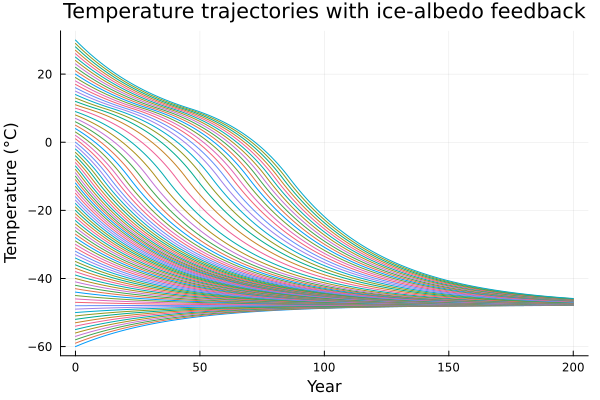

In [ ]:
C = 51
S = 1272
A = 221.2
B = -1.3
a_i = 0.5
a_0 = 0.3
years = 200

function cal_alpha(T)
    if T <= -10
        return a_i
    elseif T >= 10
        return a_0
    else
        return a_i + (a_0 - a_i)*(T + 10)/20
    end
end

function cal_T(T0,alpha)
    T = T0 + 1/C*((1-alpha)*S/4-(A-B*T0))
    return T
end

# Initial temperatures
T0s = -60:1:30

# Store trajectories
trajectories = Vector{Vector{Float64}}()

for T0 in T0s
    T = float(T0)
    traj = [T]
    for n in 1:years
        T = T + 1/C * ((1 - cal_alpha(T))*S/4 - (A - B*T))
        push!(traj, T)
    end
    println(traj[end])
    push!(trajectories, traj)
end

# Plot
plot()
for (i, T0) in enumerate(T0s)
    plot!(0:years, trajectories[i],legend=false)
end

xlabel!("Year")
ylabel!("Temperature (°C)")
title!("Temperature trajectories with ice-albedo feedback")


#### Problem 3.3
One might hypothesize that one cause for the transition from Snowball
Earth (the stable frozen equilibrium from Problem 3.2) was an increasing
amount of incoming solar radiation (as expressed by an increase in $S$).
Examine this hypothesis using our simple model. Is this factor enough to
cause the planet to warm to the pre-industrial temperature of
$14^\circ\text{C}$?

#### Answer 3.3
The equilibrium temperature of the model increases with increasing solar constant S. From the figure, we see that when S= 1368 \text{W}/\text{m}^2$, the system reaches an equilibrium temperature of approximately $14^\circ\text{C}$. So S **is enough** to cause the planet to warm to the pre-industrial temperature of
$14^\circ\text{C}$.

S = 1272 → final T = -44.75849075182547
S = 1284 → final T = -42.78633573188787
S = 1296 → final T = -40.19275896694052
S = 1308 → final T = -36.01879114294001
S = 1320 → final T = -25.971371246669165
S = 1332 → final T = 6.197447571667706
S = 1344 → final T = 10.973538543729656
S = 1356 → final T = 12.579686424422176
S = 1368 → final T = 14.185834305114694


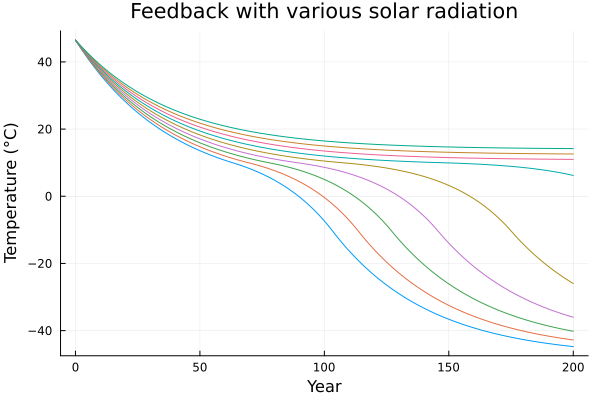

In [16]:
C = 51
S = 1272
A = 221.2
B = -1.3
a_i = 0.5
a_0 = 0.3
years = 200

# Increase solar radiation
S0s = 1272:12:1368

# Store trajectories
trajectories = Vector{Vector{Float64}}()
for S0 in S0s
    T = 46.5 # balance temperature
    traj = [T]
    for n in 1:years
        T = T + 1/C * ((1 - cal_alpha(T))*S0/4 - (A - B*T))
        push!(traj, T)
    end
    println("S = $S0 → final T = $(traj[end])")
    push!(trajectories, traj)
end

# Plot
plot()
for (i, S0) in enumerate(S0s)
    plot!(0:years, trajectories[i],legend=false)
end

xlabel!("Year")
ylabel!("Temperature (°C)")
title!("Feedback with various solar radiation")


## References

Google.